In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'Datos\gpu_metadata.csv')
df2=pd.read_csv(r'Datos\gpu_price_history.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     48 non-null     object
 1   Wattage  48 non-null     object
 2   VRAM     48 non-null     object
 3   3DMARK   48 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1087 non-null   object
 1   Name          1087 non-null   object
 2   Retail Price  1087 non-null   int64 
 3   Used Price    1087 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 34.1+ KB


In [5]:
df.head()

,Name,Wattage,VRAM,3DMARK
0,GeForce GTX 1050,75W,2GB,1861
1,GeForce GTX 1050 Ti,75W,4GB,2356
2,GeForce GTX 1060,120W,6GB,4215
3,GeForce GTX 1650,75W,4GB,3552
4,GeForce GTX 1660 SUPER,125W,6GB,6078


In [6]:
df2.head()

,Date,Name,Retail Price,Used Price
0,01-01-24,GeForce GTX 1050,0,0
1,01-02-24,GeForce GTX 1050,0,0
2,01-03-23,GeForce GTX 1050,192,61
3,01-03-24,GeForce GTX 1050,254,52
4,01-04-23,GeForce GTX 1050,181,55


In [7]:
df.describe()

,3DMARK
count,48.000000
mean,12561.916667
std,8629.770759
min,1195.000000
25%,4816.250000
50%,11561.500000
75%,19288.250000
max,35966.000000


In [8]:
df2.describe()

,Retail Price,Used Price
count,1087.000000,1087.000000
mean,478.281509,312.383625
std,412.893707,306.037560
min,0.000000,0.000000
25%,211.500000,90.000000
50%,339.000000,235.000000
75%,611.000000,425.000000
max,2229.000000,2119.000000


In [9]:
df.sample(5)

,Name,Wattage,VRAM,3DMARK
38,Radeon RX 6800,250W,16GB,15972
21,GeForce RTX 4070 Ti SUPER,285W,16GB,24426
35,Radeon RX 6650 XT,176W,8GB,10027
0,GeForce GTX 1050,75W,2GB,1861
26,Radeon R9 380,190W,4GB,2754


In [10]:
df2.sample(5)

,Date,Name,Retail Price,Used Price
686,01-03-23,Radeon RX 580,109,60
180,01-04-23,GeForce RTX 2080 Ti,999,350
1024,01-10-24,Radeon RX 7800 XT,484,425
758,01-12-23,Radeon RX 6500 XT,169,92
15,01-09-24,GeForce GTX 1050,254,52


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<Figure size 1000x600 with 0 Axes>

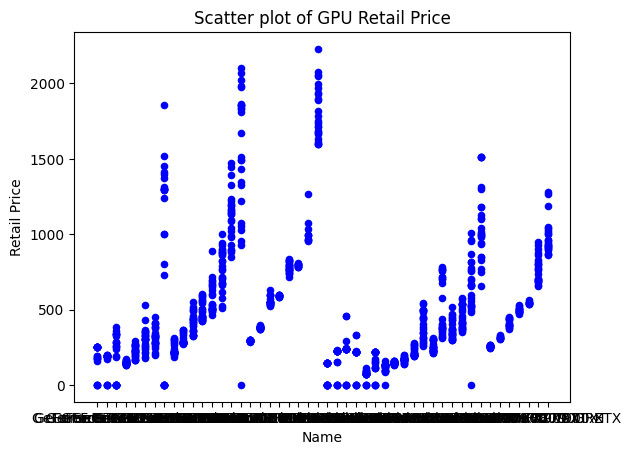

In [16]:
plt.figure(figsize=(10,6))
df2.plot.scatter(x='Name', y='Retail Price', c='blue')
plt.title('Scatter plot of GPU Retail Price')
plt.show()

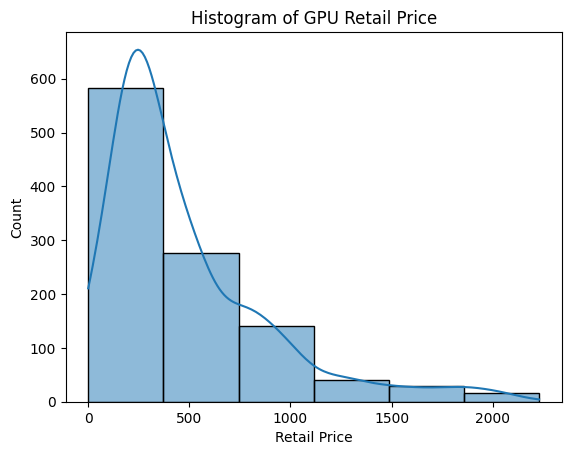

In [18]:
sns.histplot(df2['Retail Price'],bins=6 ,kde=True)
plt.title('Histogram of GPU Retail Price')
plt.show()  # The histogram shows that the majority of the GPUs have a retail price of less than $1000

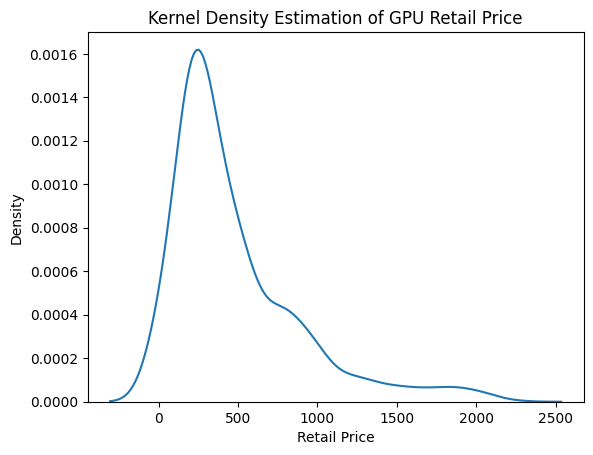

In [20]:
sns.kdeplot(df2['Retail Price'])
plt.title('Kernel Density Estimation of GPU Retail Price')
plt.show()  # The KDE plot shows that the majority of the GPUs have a retail price of less than $1000

<Axes: xlabel='Name', ylabel='count'>

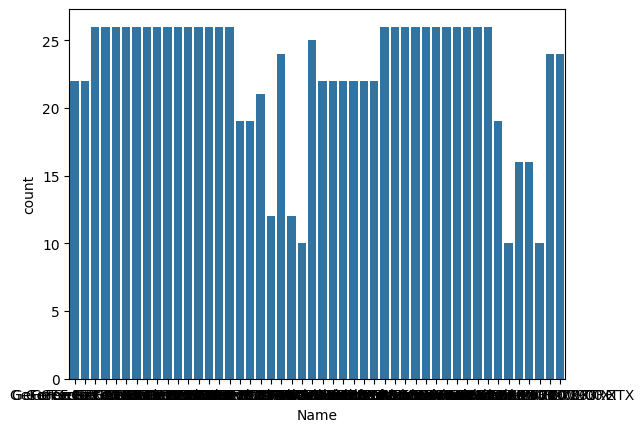

In [21]:
sns.countplot(x='Name', data=df2)

In [22]:
dfradeon=df2[df2['Name'].str.contains('Radeon')]

In [25]:
dfradeon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 550 to 1086
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          537 non-null    object
 1   Name          537 non-null    object
 2   Retail Price  537 non-null    int64 
 3   Used Price    537 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 21.0+ KB


In [27]:
dfgeforce=df2[df2['Name'].str.contains('GeForce')]

In [28]:
dfgeforce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 549
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          550 non-null    object
 1   Name          550 non-null    object
 2   Retail Price  550 non-null    int64 
 3   Used Price    550 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 21.5+ KB


<Axes: xlabel='Name', ylabel='count'>

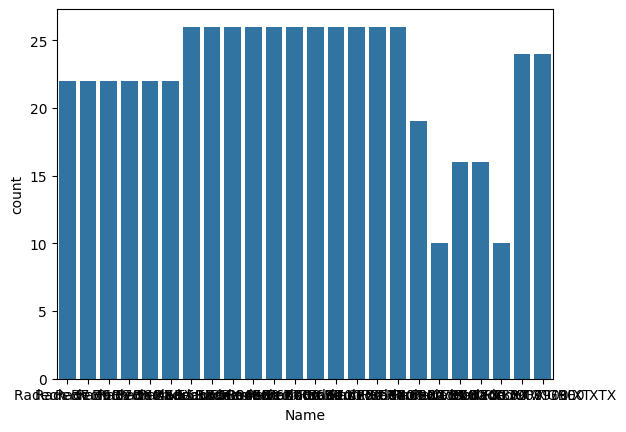

In [33]:
sns.countplot(x='Name', data=dfradeon)

<Axes: xlabel='Name', ylabel='count'>

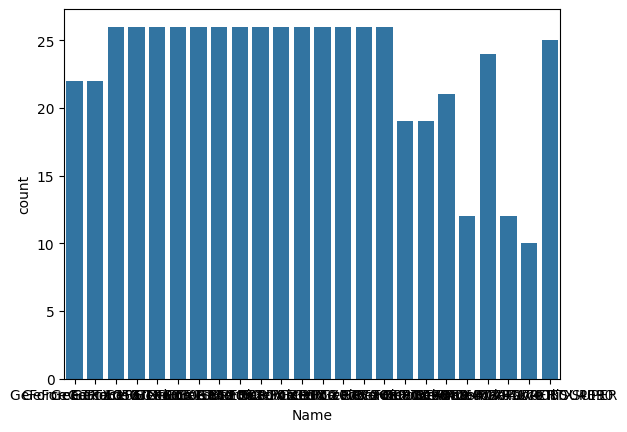

In [31]:
sns.countplot(x='Name', data=dfgeforce) 

<Axes: xlabel='Name', ylabel='Retail Price'>

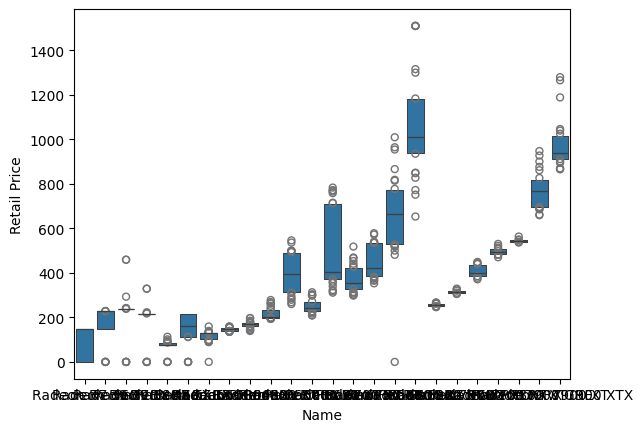

In [34]:
sns.boxenplot(x='Name', y='Retail Price', data=dfradeon)

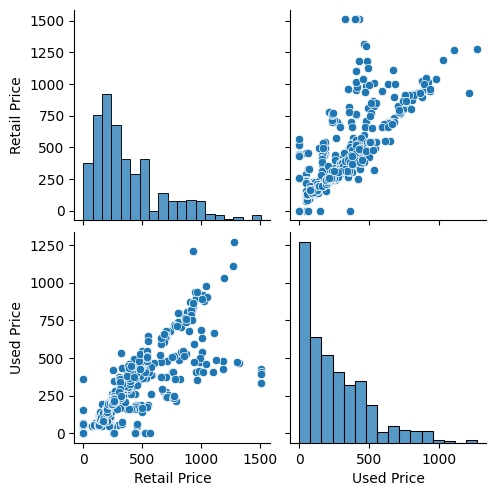

In [35]:
sns.pairplot(dfradeon)

In [36]:
dfradeon['Date']=pd.to_datetime(dfradeon['Date'])
dfgeforce['Date']=pd.to_datetime(dfgeforce['Date'])

C:\Users\Jesus\AppData\Local\Temp\ipykernel_76956\1202251353.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfradeon['Date']=pd.to_datetime(dfradeon['Date'])
C:\Users\Jesus\AppData\Local\Temp\ipykernel_76956\1202251353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfradeon['Date']=pd.to_datetime(dfradeon['Date'])
C:\Users\Jesus\AppData\Local\Temp\ipykernel_76956\1202251353.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfgeforce['Date']=pd.to_datetime(dfge

<Axes: xlabel='Date', ylabel='Retail Price'>

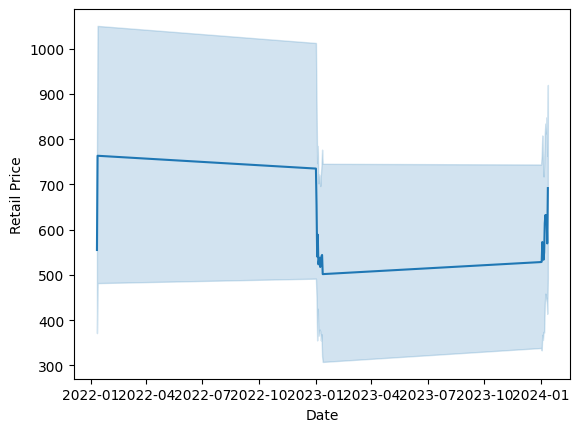

In [40]:
sns.lineplot(x='Date', y='Retail Price', data=dfgeforce)

In [41]:
dfradeon['Name'].unique()

array(['Radeon R7 360', 'Radeon R9 370', 'Radeon R9 380', 'Radeon RX 460',
       'Radeon RX 550', 'Radeon RX 560', 'Radeon RX 580',
       'Radeon RX 6400', 'Radeon RX 6500 XT', 'Radeon RX 6600',
       'Radeon RX 6600 XT', 'Radeon RX 6650 XT', 'Radeon RX 6700 XT',
       'Radeon RX 6750 XT', 'Radeon RX 6800', 'Radeon RX 6800 XT',
       'Radeon RX 6900 XT', 'Radeon RX 7600', 'Radeon RX 7600 XT',
       'Radeon RX 7700 XT', 'Radeon RX 7800 XT', 'Radeon RX 7900 GRE',
       'Radeon RX 7900 XT', 'Radeon RX 7900 XTX'], dtype=object)

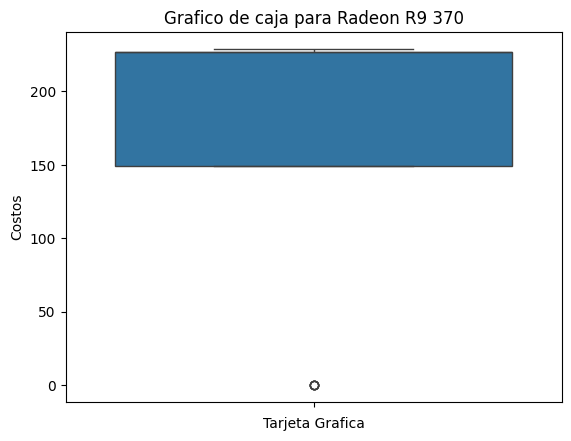

In [45]:
tarjeta="Radeon R9 370"
df_filtrado=dfradeon[dfradeon['Name']==tarjeta]
sns.boxplot(y=df_filtrado['Retail Price'])
plt.title(f'Grafico de caja para {tarjeta}')
plt.xlabel('Tarjeta Grafica')
plt.ylabel('Costos')
plt.show()